In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Quintic Trajectories

In [2]:
def quintic_trajectory(p0, pf, v0, vf, ai, af, delta_t):
    t = np.linspace(0, delta_t, 100)  
    a0 = p0
    a1 = v0
    a2 = ai/2
    a3 = (20 * pf - 20 * p0 - (8*vf + 12*v0) * delta_t - (3 * ai - af) * delta_t**2) / (2 * delta_t**3)
    a4 = (30 * p0 - 30 * pf + (14*vf + 16*v0) * delta_t + (3 * ai - 2 * af) * delta_t**2) / (2 * delta_t**4)
    a5 = (12 * pf - 12 * p0 - (6*vf + 6*v0) * delta_t - (ai - af) * delta_t**2) / (2 * delta_t**5)

        
    polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3 + a4 * t**4 + a5 * t**5
    derivative = a1 + 2 * a2 * t + 3 * a3 * t**2 + 4 * a4 * t**3 + 5 * a5 * t**4
    second_derivative = 2 * a2 + 6 * a3 * t + 12 * a4 * t**2 + 20 * a5 * t**3
    
    return polynomial, derivative, second_derivative

def cubic_trajectory(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, Ax, Ay, T):
    theta_x, theta_y, dx, dy, theta2_x, theta2_y, dx2, dy2, ddx2, ddy2 = [], [], [], [], [], [], [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = cubic_trajectory(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = cubic_trajectory(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])
        
        theta2_xi, dxi2, ddxi2 = quintic_trajectory(X[i], X[i+1], Vx[i], Vx[i+1], Ax[i], Ax[i+1], T[i+1] - T[i])
        theta2_yi, dyi2, ddyi2 = quintic_trajectory(Y[i], Y[i+1], Vy[i], Vy[i+1], Ay[i], Ay[i+1], T[i+1] - T[i])
        
        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()
        
        theta2_x += theta2_xi.tolist()
        theta2_y += theta2_yi.tolist()
        dx2 += dxi2.tolist()
        dy2 += dyi2.tolist()
        ddx2 += ddxi2.tolist()
        ddy2 += ddyi2.tolist()       
        plot(theta_xi, theta_yi)
        plot(theta2_xi, theta2_yi, '--',  linewidth = 2.5)
        
#     print(len(P))
    return theta_x, theta_y, dx, dy, theta2_x, theta2_y, dx2, dy2, ddx2, ddy2

In [3]:
# Plotting
def plot_points():
    plot(X,Y,)
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

In [4]:
##### Requirements for the trajectory

# Waypoints
p1 = [0.,0]
p2 = [2,3]
p3 = [4,5]
p4 = [5,-1]
p5 = [1,-1]

# Velocities
# v1 = [0,-0.001]
# v2 = [-1,1]
# v3 = [1,0]
# v4 = [-1,1]
# v5 = [0,-0.001]

v1 = [0,-0.001]
v2 = [1,1]
v3 = [1,0]
v4 = [1,1]
v5 = [0,-0.001]

a1 = [0,0]
a2 = [0,0]
a3 = [0,0]
a4 = [0,0]
a5 = [0,0]

# Time
t1 = 0
t2 = 12
t3 = 22
t4 = 32
t5 = 42

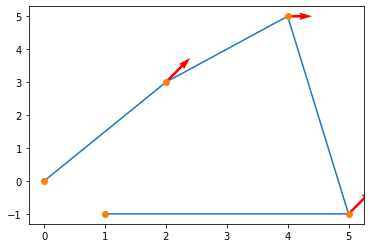

In [5]:
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5))
V = np.vstack((v1, v2, v3, v4, v5))
A = np.vstack((a1, a2, a3, a4, a5))
T = [t1, t2, t3, t4, t5]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]
Ax, Ay = A[:,0], A[:,1]


    
plot_points()

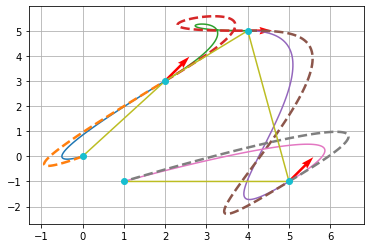

In [6]:
# Plot the trajectory that passes trhough the desired waypoints
theta_x, theta_y, dx, dy, theta2_x, theta2_y, dx2, dy2, ddx2, ddy2 = piecewise2D(X,Y, Vx, Vy, Ax, Ay, T)
plot_points()
grid()

In [7]:
def box_points(w, h):
    points = np.zeros([5,3])
    points[0] = [ + w/2, 0, + h/2]
    points[1] = [ + w/2, 0, - h/2]
    points[2] = [ - w/2, 0, - h/2]
    points[3] = [ - w/2, 0, + h/2]
    points[4] = [ + w/2, 0, + h/2]
    return points

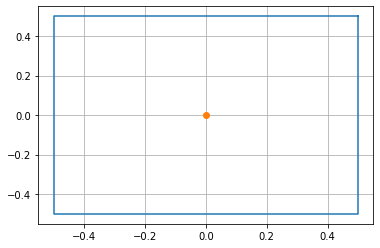

In [8]:
RotY = lambda θ: [[cos(θ), 0, sin(θ)], 
         [0, 1, 0],
         [-sin(θ), 0, cos(θ)]]
def box_se2(x, z, θ, u=[0,0], w=1, h=1, angs=array([0, -pi/2, pi/2, -pi]), ax=plt.axes()):
    points = box_points(w, h)
#     θ= -θ
    # Rotation matrix
    R = [[cos(θ), 0, sin(θ)], 
         [0, 1, 0],
         [-sin(θ), 0, cos(θ)]]
#     for p in points:
#         print(p)
#     print(a)
    # Rotate
    points = [np.dot(R, p) for p in points]
#     print(points)
    points = array(points)
#     print(points)
    
    # translate
    points[:,0] += x
    points[:,2] += z
    #angs = array(angs)
    angs += θ
    # propellers
    e1 = [1,0,0]    
    prop_x = array([np.dot(RotY(ang), e1)[0] for ang in angs])
    prop_z = array([np.dot(RotY(ang), e1)[2] for ang in angs])
#     prop_x = array([sin(θ), sin(θ)])
#     prop_z = array([cos(θ), cos(θ)])
        
    # Plot propellers
    #points[0,0] -= w/2
#     p3 = points[0,0] + w/2
#     px = concatenate((p3,points[1:3,0]), axis=None)
    px = points[0:4,0]
    pz = points[0:4,2]
    #print(px,pz)
#     ax.quiver(px, pz, prop_x, prop_z, scale=7)
    
    ax.plot(points[:,0], points[:,2])
    # control input    
#     ax.quiver(px, pz, u*prop_x, u*prop_z, scale=7, color='r')
#     ax.set_xlim((-4, 4))
#     ax.set_ylim((-4, 4))
    plot(x,z, 'o')
    
angle = 0* pi/180
x, z, θ = 0,0, angle
# box_se2(0, 0, 0, [3,3], w=2, h=2)
# x, z, θ = 1,1, 0
box_se2(x, z, θ, [0.5,0.5,0.5,0.5], w=1, h=1)
grid()

In [10]:
def simulate(Δt, x, dx):   
    x += Δt * dx
    return x

In [11]:
angs=array([0, -pi/2, pi/2, -pi])
w, h = 1, 1
points = box_points(w, h)
px, pz = points[0:4,0], points[0:4,2]
print(points[0:4,0], points[0:4,2])

A2 = array([(cos(angs[0]), cos(angs[1]), cos(angs[2]), cos(angs[3])),
           (sin(angs[0]), sin(angs[1]), sin(angs[2]), sin(angs[3])),
           (pz[0]*cos(angs[0])-px[0]*sin(angs[0]),
           pz[1]*cos(angs[1])-px[1]*sin(angs[1]),
           pz[2]*cos(angs[2])-px[2]*sin(angs[2]),
           pz[3]*cos(angs[3])-px[3]*sin(angs[3]))])

A = array([(cos(angs[0]), cos(angs[1]), cos(angs[2])),
           (sin(angs[0]), sin(angs[1]), sin(angs[2])),
           (pz[0]*cos(angs[0])-px[0]*sin(angs[0]),
           pz[1]*cos(angs[1])-px[1]*sin(angs[1]),
           pz[2]*cos(angs[2])-px[2]*sin(angs[2]))])
#print(A2)
rank = np.linalg.matrix_rank(A)
rank2 = np.linalg.matrix_rank(A2)
ei_values, ei_vectors = np.linalg.eig(A)
print('rank of A:', rank, 'rank of A2:', rank2, ' its eigenvalues: ', ei_values, ' its eigenvectors: ',ei_vectors)
# A2inv = inv(A)
A2inv = np.linalg.pinv(A2)
Ainv = inv(A)
print('A inverse:',Ainv)
print('A2 inverse:', A2inv)

[ 0.5  0.5 -0.5 -0.5] [ 0.5 -0.5 -0.5  0.5]
rank of A: 3 rank of A2: 3  its eigenvalues:  [ 1.          0.78077641 -1.28077641]  its eigenvectors:  [[-4.08248290e-01 -5.01435290e-16 -1.34097551e-17]
 [-4.08248290e-01  4.89633738e-01 -9.62769686e-01]
 [-8.16496581e-01  8.71928209e-01  2.70323013e-01]]
A inverse: [[ 1.0000000e+00  0.0000000e+00 -1.2246468e-16]
 [-5.0000000e-01 -5.0000000e-01  1.0000000e+00]
 [-5.0000000e-01  5.0000000e-01  1.0000000e+00]]
A2 inverse: [[ 5.00000000e-01 -1.29315261e-16 -2.59485599e-16]
 [-5.00000000e-01 -5.00000000e-01  1.00000000e+00]
 [-5.00000000e-01  5.00000000e-01  1.00000000e+00]
 [-5.00000000e-01  6.80829207e-17 -9.11970350e-17]]


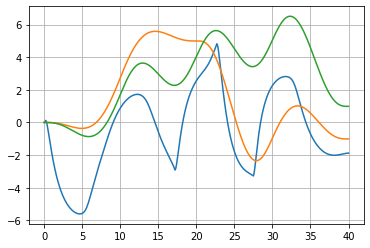

In [69]:
# z unit vector
e3 = np.array([0,0,1])
g = [0, 0, -9.8]
m = 1
Iy = 1
tf = 40.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

kpx, kvx, kpz, kvz, kpθ, kvθ = 1, 3, 1, 2, 2, 4
# Desired state
# xd = np.array([2, 3, pi/2, 0., 0., 0.])
x = np.array([0, 0, 0, 0., 0., 0.])
dx = np.array([0, 0, 0, 0., 0., 0.])

x_log = [copy(x)]
u_log = [[0, 0, 0, 0]]
xd_log = [[theta2_x[0], theta2_y[0], np.arctan2(theta2_x[0], theta2_y[0]), dx2[0], dy2[0], np.arctan2(dx2[0], dy2[0])]]

for t in time[0:400]:
    h = int(t*10)
    xd = np.array([theta2_x[h], theta2_y[h], np.arctan2(theta2_x[h], theta2_y[h]), dx2[h], dy2[h], np.arctan2(dx2[h], dy2[h])])
    px, pz, pθ, vx, vz, vθ = x
    pxd, pzd, pθd, vxd, vzd, vθd = xd 
    
    # PD controller         
    ax = (pxd - px) * kpx + (vxd-vx) * kvx + ddx2[h]
    az = (pzd - pz) * kpz + (vzd-vz) * kvz + ddy2[h]
    aθ = (pθd - pθ) * kpθ + (vθd-vθ) * kvθ
    a = array([ax, az, aθ])
    
    w = [m * ax, m * az, Iy * aθ]  
    B1 = [[cos(θ)/m, sin(θ)/m, 0], 
          [-sin(θ)/m, cos(θ)/m, 0],
         [0, 0, 1/Iy]]
    B = np.dot(B1,A)
    B2 = np.dot(B1,A2)
    
    Binv = inv(B)
    B2inv = np.linalg.pinv(B2)
    u = np.dot(B2inv,(a + g)) 
#     # Dynamics
    a = np.dot(B2,u) - g
    dx[:3] = x[3:]
    dx[3:] = a
    
    x = simulate(Δt, x, dx)
    x_log.append(copy(x))
    u_log.append(copy(u))
    xd_log.append(copy(xd))
x_log = array(x_log)
u_log = array(u_log)
xd_log = array(xd_log)
grid()
plot(time, x_log[:,2], label='$x$')
plot(time, x_log[:,1], label='$x$')
plot(time, x_log[:,0], label='$x$')


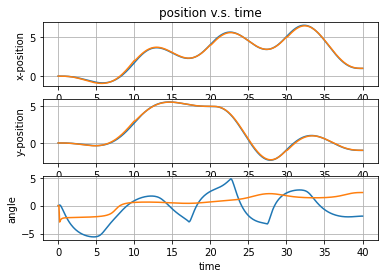

In [72]:
fig = plt.figure()
ax11 = fig.add_subplot(311)
ax11.grid()
ax11.set_ylabel('x-position')
ax11.set_xlabel('time')
ax11.set_title('position v.s. time')
ax11.plot(time, x_log[:,0])
ax11.plot(time, xd_log[:,0])
# print(size(xd))

ax12 = fig.add_subplot(312)
ax12.grid()
ax12.set_ylabel('y-position')
ax12.set_xlabel('time')
# ax12.set_ylim((0, 4))
ax12.plot(time, x_log[:, 1])
ax12.plot(time, xd_log[:, 1])

ax13 = fig.add_subplot(313)
ax13.grid()
ax13.set_ylabel('angle')
ax13.set_xlabel('time')
ax13.plot(time, x_log[:, 2])
ax13.plot(time, xd_log[:, 2])

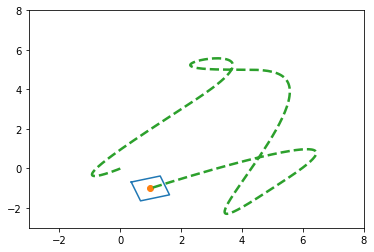

In [59]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()



def animate(t):
    ax.clear()       
        
    px, pz, θ, vx, vz, vθ = x_log[t]
    u = u_log[t]
    #print(u)
    # box points
    box_se2(px, pz, θ, u, w=1, h=1, ax=ax)

 
    # Initial conditions
    ax.plot(t, x_log[t,0],  'bo')
    ax.plot(theta2_x, theta2_y, '--',  linewidth = 2.5)
    ax.set_xlim((-3., 8.))
    ax.set_ylim((-3.,8.))
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())